In [665]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [666]:
df_test=pd.read_excel('E:/docfees_Test.xlsx')
df_train=pd.read_excel('E:/docfees_Train.xlsx')

In [667]:
df_fees=df_train.append(df_test)

In [668]:
df_fees

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN


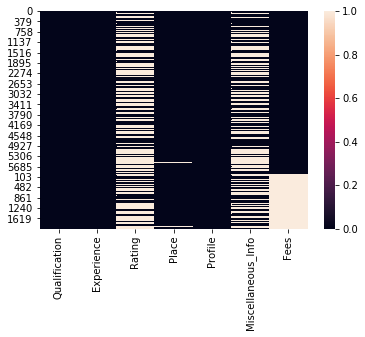

In [669]:
#checking for any missing data
sns.heatmap(df_fees.isnull())

In [670]:
df_fees.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

In [671]:
df_fees.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [672]:
df_fees.dtypes

Qualification     object
Experience        object
Rating            object
Place             object
Profile           object
Fees             float64
dtype: object

In [673]:
df_fees['Rating']=df_fees['Rating'].str.split('%').str[0]

In [674]:
df_fees['Rating']=df_fees['Rating'].replace(np.NaN,int(0))

In [675]:
df_fees['Rating']=df_fees['Rating'].astype(int)

In [676]:
df_fees['Rating']

0       100
1        98
2         0
3         0
4       100
       ... 
1982      0
1983      0
1984      0
1985     98
1986      0
Name: Rating, Length: 7948, dtype: int32

In [677]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(10)]
df_fees["Rating"] = pd.cut(df_fees["Rating"],bins=bins,labels=labels,include_lowest=True)

In [678]:
df_fees['Rating']

0       9
1       9
2       0
3       0
4       9
       ..
1982    0
1983    0
1984    0
1985    9
1986    0
Name: Rating, Length: 7948, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [679]:
df_fees['Experience']=df_fees['Experience'].str.split(' ').str[0]

In [680]:
df_fees['Experience']=df_fees['Experience'].astype(int)

In [681]:
df_fees['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 7948, dtype: int32

In [682]:
df_fees['Place']=df_fees['Place'].replace(np.NaN,'Not Known')

In [683]:
df_fees['Place_N']=df_fees['Place'].str.split(',').str[0]

In [684]:
df_fees['City']=df_fees['Place'].str.split(',').str[-1]

In [685]:
print(df_fees['Place_N'])
print(df_fees['City'])

0                Kakkanad
1              Whitefield
2         Mathikere - BEL
3       Bannerghatta Road
4            Keelkattalai
              ...        
1982         Basavanagudi
1983              Choolai
1984                Porur
1985              Arekere
1986         Pallikaranai
Name: Place_N, Length: 7948, dtype: object
0        Ernakulam
1        Bangalore
2        Bangalore
3        Bangalore
4          Chennai
           ...    
1982     Bangalore
1983       Chennai
1984       Chennai
1985     Bangalore
1986       Chennai
Name: City, Length: 7948, dtype: object


In [686]:
df_fees.isnull().sum()

Qualification       0
Experience          0
Rating              0
Place               0
Profile             0
Fees             1987
Place_N             0
City                0
dtype: int64

In [687]:
#checking data types
df_fees.dtypes
#We can see all the data is in numerical form and categorical form

Qualification      object
Experience          int32
Rating           category
Place              object
Profile            object
Fees              float64
Place_N            object
City               object
dtype: object

In [688]:
#checking the basic info about the attributes and their counts
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Qualification  7948 non-null   object  
 1   Experience     7948 non-null   int32   
 2   Rating         7948 non-null   category
 3   Place          7948 non-null   object  
 4   Profile        7948 non-null   object  
 5   Fees           5961 non-null   float64 
 6   Place_N        7948 non-null   object  
 7   City           7948 non-null   object  
dtypes: category(1), float64(1), int32(1), object(5)
memory usage: 473.9+ KB


In [689]:
#checking the maximum and minimum values of each attribute and their percentiles
df_fees.describe()

,Experience,Fees
count,7948.000000,5961.000000
mean,17.446653,307.944640
std,11.201217,190.920373
min,0.000000,5.000000
25%,9.000000,150.000000
50%,15.000000,300.000000
75%,23.000000,500.000000
max,66.000000,950.000000


In [690]:
df_fees

,Qualification,Experience,Rating,Place,Profile,Fees,Place_N,City
0,"BHMS, MD - Homeopathy",24,9,"Kakkanad, Ernakulam",Homeopath,100.0,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,9,"Whitefield, Bangalore",Ayurveda,350.0,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,250.0,Bannerghatta Road,Bangalore
4,BAMS,20,9,"Keelkattalai, Chennai",Ayurveda,250.0,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,0,"Basavanagudi, Bangalore",Ayurveda,NaN,Basavanagudi,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,"Choolai, Chennai",Dermatologists,NaN,Choolai,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,"Porur, Chennai",General Medicine,NaN,Porur,Chennai
1985,BDS,12,9,"Arekere, Bangalore",Dentist,NaN,Arekere,Bangalore


In [691]:
df_fees['Qualification'].value_counts()

BDS                                                                                                                                                  632
BHMS                                                                                                                                                 627
BAMS                                                                                                                                                 624
MBBS                                                                                                                                                 441
MBBS, MS - ENT                                                                                                                                       280
                                                                                                                                                    ... 
Diploma in Family Medicine (DFM), Post Graduate Diploma in Clinical Research (PGDC

In [692]:
df_fees['Qualification']=df_fees['Qualification'].str.split(' ').str[0]

In [693]:
df_fees['Qualification'].value_counts()

MBBS,        2872
BDS,          947
BDS           632
BHMS          627
BAMS          624
             ... 
CGO,            1
MBA             1
GCEH            1
Doctorate       1
DEHM,           1
Name: Qualification, Length: 97, dtype: int64

In [694]:
df_fees['Qualification']=df_fees['Qualification'].str.split(',').str[0]

In [695]:
df_fees['Qualification']=df_fees['Qualification'].str.split('-').str[0]

In [696]:
df_fees['Qualification'].value_counts()

MBBS         3313
BDS          1579
BAMS          939
BHMS          938
MD            420
             ... 
PGD             1
POST            1
Diplomate       1
FFDRCSI         1
FICD            1
Name: Qualification, Length: 80, dtype: int64

In [697]:
for i in df_fees:
    print(df_fees[i].value_counts())

MBBS         3313
BDS          1579
BAMS          939
BHMS          938
MD            420
             ... 
PGD             1
POST            1
Diplomate       1
FFDRCSI         1
FICD            1
Name: Qualification, Length: 80, dtype: int64
9     419
10    404
8     380
11    374
12    358
     ... 
60      1
64      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64
0    4393
9    2961
8     388
7     125
6      46
5      28
3       4
4       3
2       0
1       0
Name: Rating, dtype: int64
HSR Layout, Bangalore       97
Andheri West, Mumbai        97
Dwarka, Delhi               93
Banjara Hills, Hyderabad    85
Mulund West, Mumbai         81
                            ..
Beeramguda, Hyderabad        1
Mount Road, Chennai          1
Kalu Sarai, Delhi            1
Chitlapakkam, Chennai        1
Nand Nagri, Delhi            1
Name: Place, Length: 949, dtype: int64
Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1

In [698]:
df_fees['City']=df_fees['City'].replace('e','Not Known')

In [699]:
for i in df_fees:
    print(df_fees[i].value_counts())

MBBS         3313
BDS          1579
BAMS          939
BHMS          938
MD            420
             ... 
PGD             1
POST            1
Diplomate       1
FFDRCSI         1
FICD            1
Name: Qualification, Length: 80, dtype: int64
9     419
10    404
8     380
11    374
12    358
     ... 
60      1
64      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64
0    4393
9    2961
8     388
7     125
6      46
5      28
3       4
4       3
2       0
1       0
Name: Rating, dtype: int64
HSR Layout, Bangalore       97
Andheri West, Mumbai        97
Dwarka, Delhi               93
Banjara Hills, Hyderabad    85
Mulund West, Mumbai         81
                            ..
Beeramguda, Hyderabad        1
Mount Road, Chennai          1
Kalu Sarai, Delhi            1
Chitlapakkam, Chennai        1
Nand Nagri, Delhi            1
Name: Place, Length: 949, dtype: int64
Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1

# Univariate Analysis

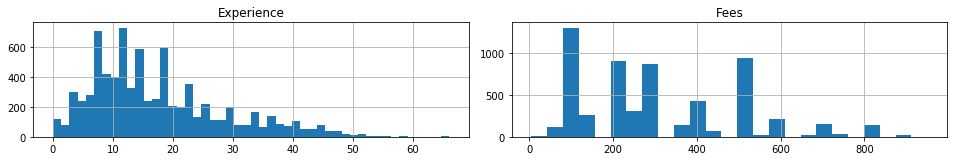

In [700]:
df_fees.hist(figsize = (20,12), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

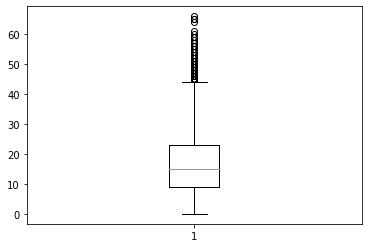

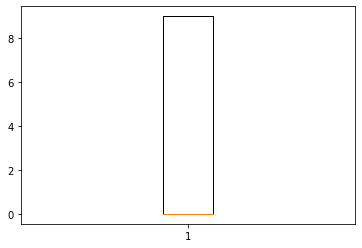

In [701]:
for i in ['Experience','Rating'] :
    plt.boxplot(df_fees[i])
    plt.show()

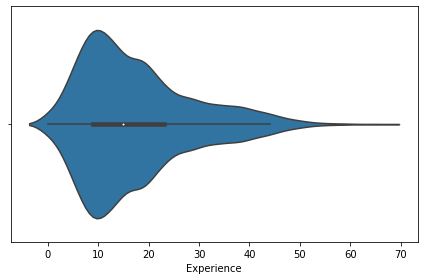

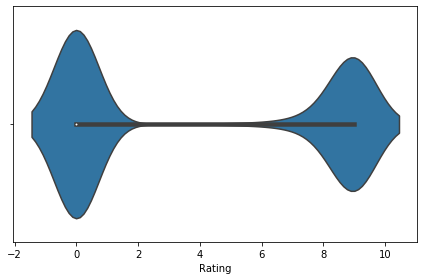

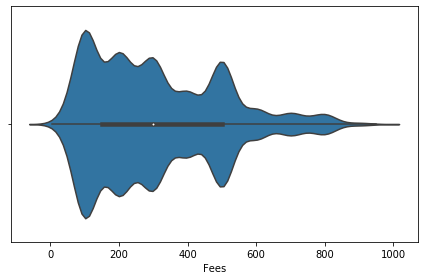

In [702]:
for i in ['Experience','Rating',"Fees"]:
    sns.violinplot(x=i,data=df_fees)
    plt.tight_layout()
    plt.show()

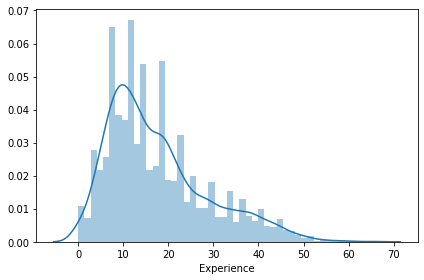

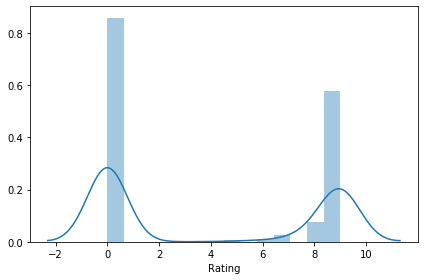

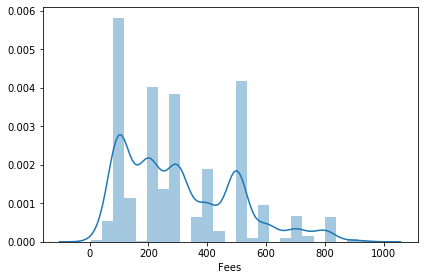

In [703]:
#Checking for the distribution of the data
for i in ['Experience','Rating',"Fees"]:
    sns.distplot(df_fees[i],bins='auto')
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

In [704]:
df_fees.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees',
       'Place_N', 'City'],
      dtype='object')

In [705]:
df_fees.drop(['Place','Place_N'],axis=1,inplace=True)

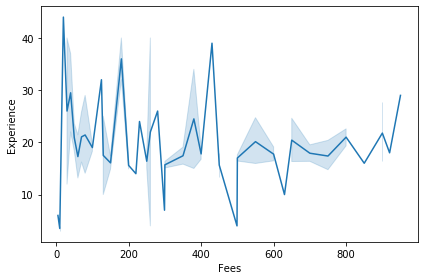

In [706]:
for i in ['Experience']:
    sns.lineplot(df_fees['Fees'],df_fees[i])
    plt.tight_layout()
    plt.show()

In [707]:
df_fees

,Qualification,Experience,Rating,Profile,Fees,City
0,BHMS,24,9,Homeopath,100.0,Ernakulam
1,BAMS,12,9,Ayurveda,350.0,Bangalore
2,MBBS,9,0,ENT Specialist,300.0,Bangalore
3,BSc,12,0,Ayurveda,250.0,Bangalore
4,BAMS,20,9,Ayurveda,250.0,Chennai
...,...,...,...,...,...,...
1982,BAMS,10,0,Ayurveda,NaN,Bangalore
1983,MD,4,0,Dermatologists,NaN,Chennai
1984,MBBS,9,0,General Medicine,NaN,Chennai
1985,BDS,12,9,Dentist,NaN,Bangalore


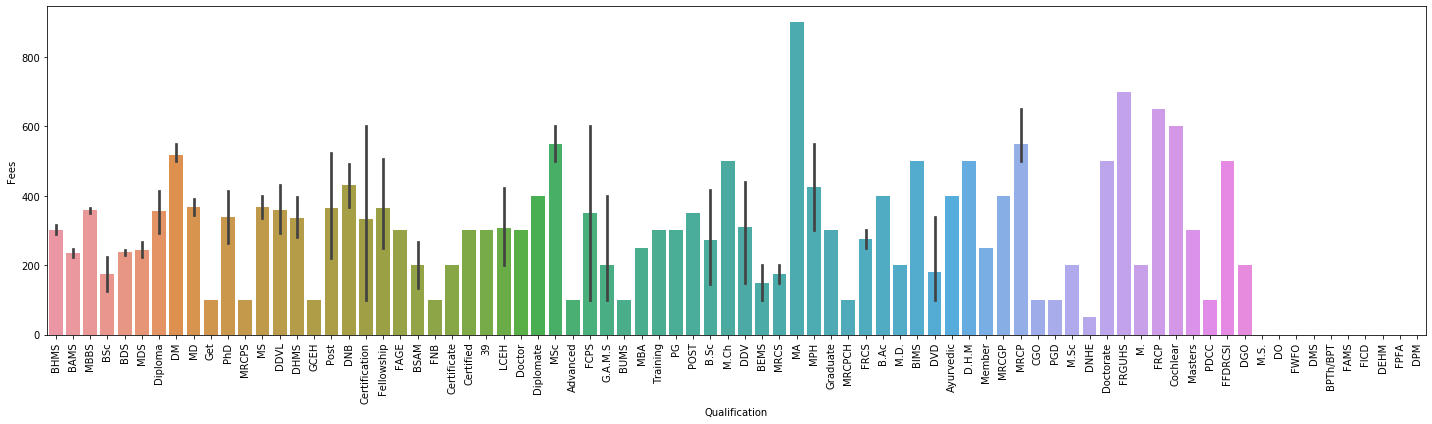

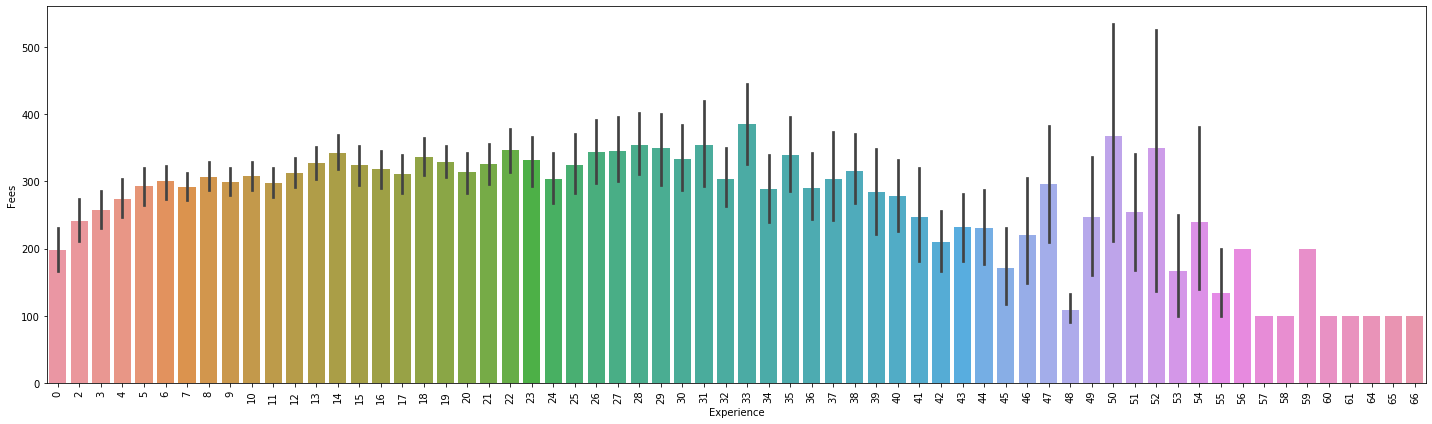

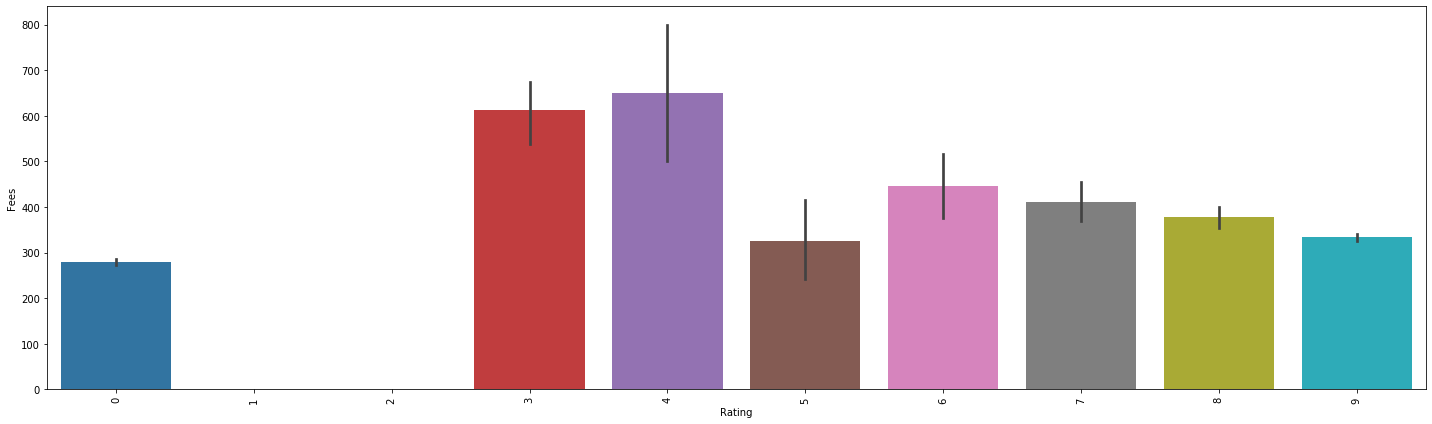

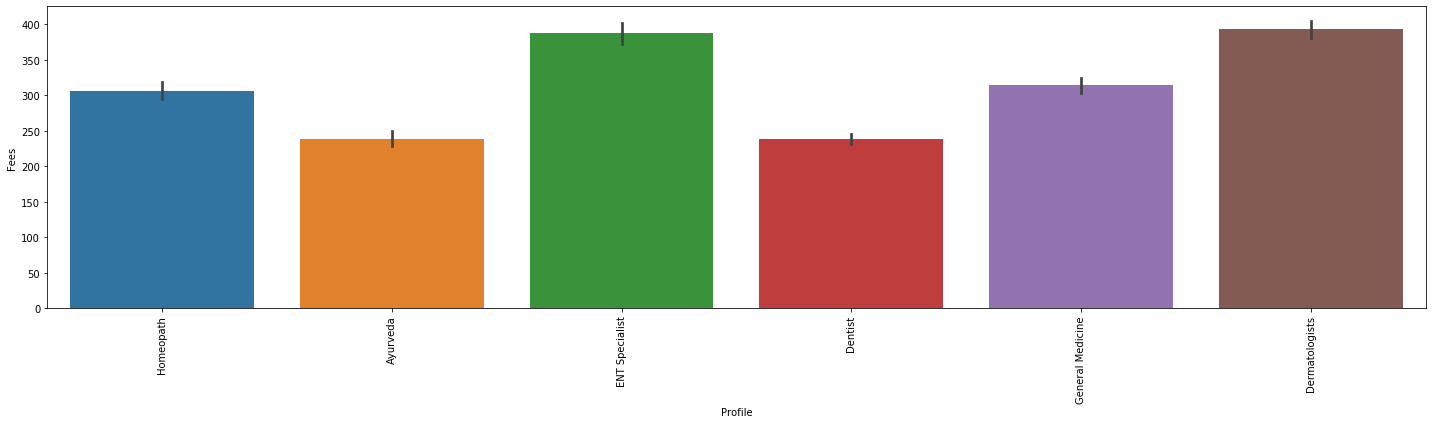

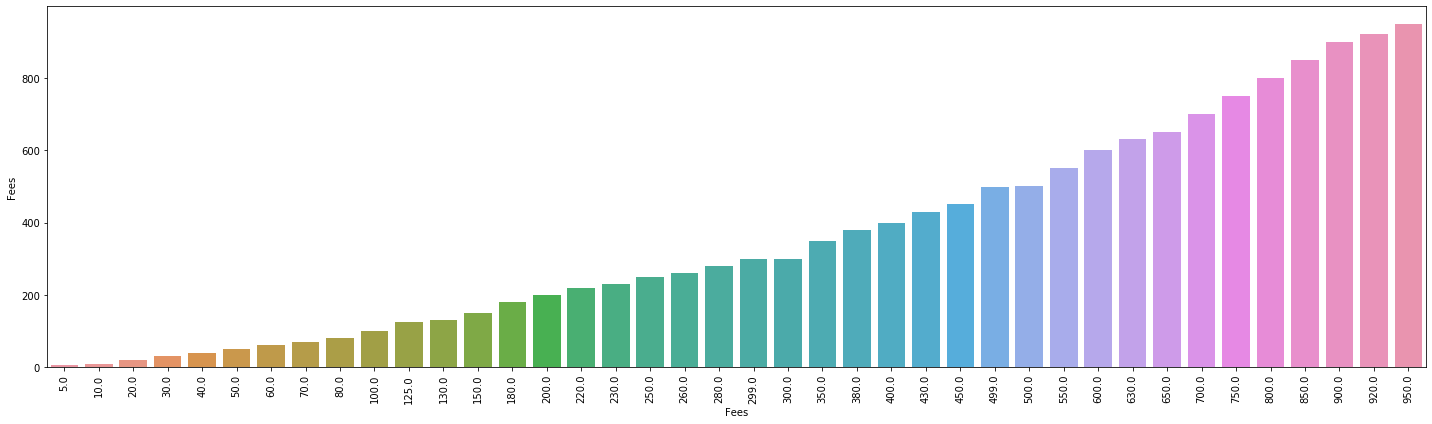

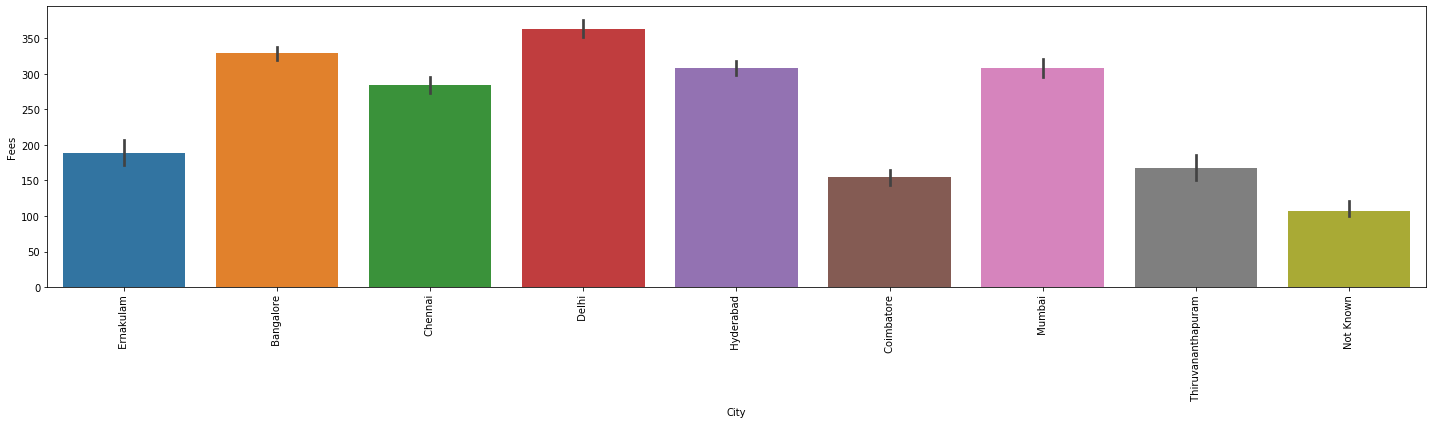

In [708]:
for i in df_fees.columns:
    plt.figure(figsize=(20,6))
    plt.xticks(rotation=90)
    sns.barplot(df_fees[i],df_fees['Fees'])
    plt.tight_layout()
    plt.show()

In [709]:
#Checking the correlation between the attributes
df_fees.corr()

,Experience,Fees
Experience,1.000000,0.002117
Fees,0.002117,1.000000


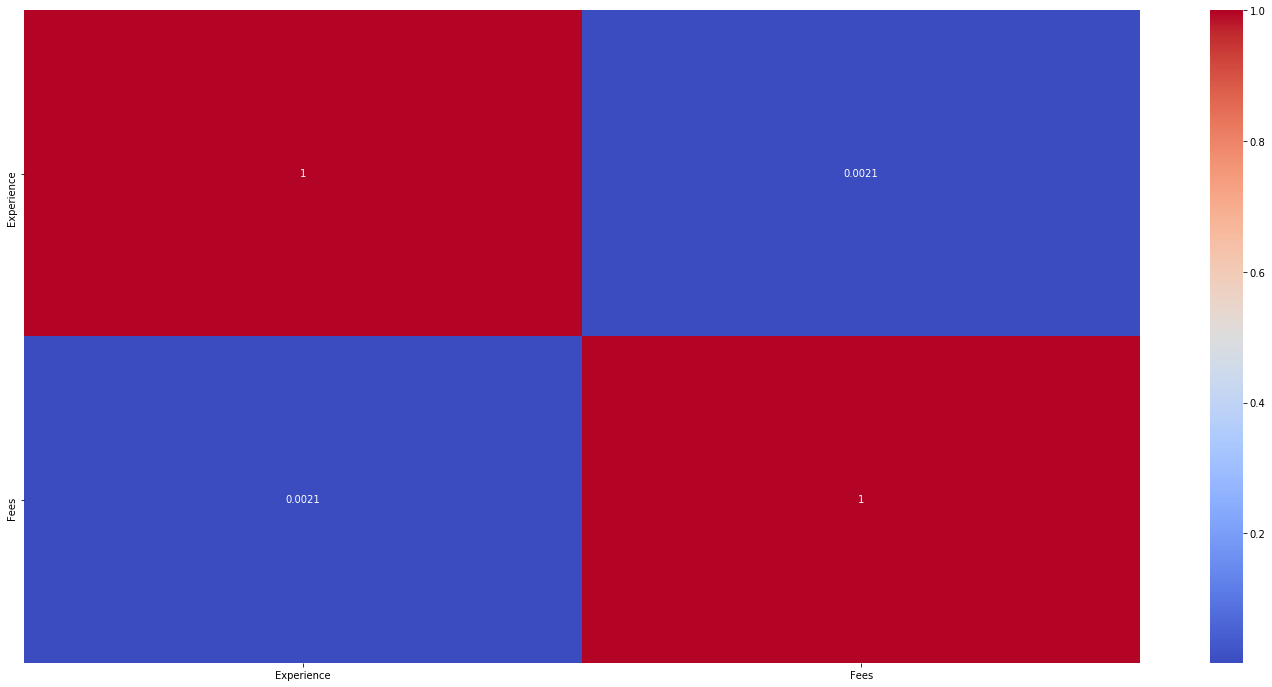

In [710]:
plt.figure(figsize=(25,12))
sns.heatmap(df_fees.corr(),cmap='coolwarm',annot=True)
plt.show()

In [711]:
#Cheking the skewness of data
df_fees.skew()

Experience    0.984224
Rating        0.239818
Fees          0.751870
dtype: float64

In [712]:
df_fees.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile', 'Fees', 'City'], dtype='object')

In [713]:
#removing skewness using log transform
for col in ['Experience','Fees']:
    if df_fees.skew().loc[col]>0.55:
        df_fees[col]=np.log1p(df_fees[col])

In [714]:
df_fees.skew()
#skewness is reduced

Experience   -0.910706
Rating        0.239818
Fees         -0.298173
dtype: float64

In [715]:
df_fees=pd.get_dummies(df_fees,columns=["City","Profile"],prefix=["City","Profile"])

In [716]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_fees['Qualification']=le.fit_transform(df_fees['Qualification'])

In [717]:
df_train=df_fees[0:5961]
df_test=df_fees[5961:]

In [718]:
df_fees=df_train

In [719]:
df_fees

,Qualification,Experience,Rating,Fees,City_ Bangalore,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Not Known,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,8,3.218876,9,4.615121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5,2.564949,9,5.860786,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,60,2.302585,0,5.707110,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,2.564949,0,5.525453,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,3.044522,9,5.525453,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,60,2.995732,9,5.707110,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5957,60,3.526361,0,4.615121,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5958,60,3.737670,9,6.398595,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5959,60,2.772589,8,4.615121,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [720]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_fees[['Experience','Fees']]))
print(zscore)
print(np.where(zscore>3))
df_fees_new=df_fees[(zscore<3).all(axis=1)]

[[0.74459804 1.33145457]
 [0.20043453 0.4975396 ]
 [0.57959456 0.27189926]
 ...
 [1.49434141 1.28719688]
 [0.09963891 1.33145457]
 [0.26985499 0.3210027 ]]
(array([  91,  168,  380,  383,  409,  502,  599,  602,  605,  616,  640,
        724,  870,  945,  973,  975, 1002, 1083, 1122, 1142, 1175, 1210,
       1254, 1316, 1379, 1470, 1553, 1560, 1605, 1659, 1727, 1743, 1869,
       1879, 1910, 1930, 2078, 2091, 2178, 2283, 2328, 2563, 2637, 2641,
       2682, 2714, 2773, 2850, 2968, 3090, 3099, 3125, 3177, 3228, 3303,
       3344, 3418, 3443, 3468, 3499, 3502, 3720, 3744, 3804, 3896, 3963,
       4004, 4012, 4067, 4239, 4248, 4282, 4290, 4295, 4338, 4391, 4427,
       4546, 4748, 4758, 4847, 4948, 5058, 5095, 5171, 5187, 5267, 5271,
       5527, 5533, 5551, 5703, 5723, 5821, 5930], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [721]:
print('Before removing outliers:',df_fees.shape)
print('After removing outliers:',df_fees_new.shape)

Before removing outliers: (5961, 19)
After removing outliers: (5866, 19)


In [723]:
#separating into input and output variables
df_x=df_fees_new.drop(columns=['Fees'])
y=pd.DataFrame(df_fees_new['Fees'])

In [724]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [725]:
x.shape

(5866, 18)

In [726]:
y.shape

(5866, 1)

In [727]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [728]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.167569513090284
r2 score corresponding to 43 is 0.17274946220396814
r2 score corresponding to 44 is 0.14575087895148342
r2 score corresponding to 45 is 0.15609276688280904
r2 score corresponding to 46 is 0.175067673642754
r2 score corresponding to 47 is 0.15162763697489445
r2 score corresponding to 48 is 0.2021999954192727
r2 score corresponding to 49 is 0.14844592507813092
r2 score corresponding to 50 is 0.1526040918403574
r2 score corresponding to 51 is 0.20015096031083313
r2 score corresponding to 52 is 0.1626443383582904
r2 score corresponding to 53 is 0.1516275702625285
r2 score corresponding to 54 is 0.18804071572435654
r2 score corresponding to 55 is 0.13343604590080138
r2 score corresponding to 56 is 0.1776023944637617
r2 score corresponding to 57 is 0.1436006016466086
r2 score corresponding to 58 is 0.19608047309730803
r2 score corresponding to 59 is 0.17755443486365607
r2 score corresponding to 60 is 0.17899275909300982
r2 score corresponding

In [729]:
#checking the mean r2 score of both Linear Regression Model 
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(LR,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(LR,x,y,cv=5,scoring='r2').std())

Mean r2 score for Linear Regression: 0.1588764778814678
Standard Deviation in r2 score for Linear Regression: 0.017824157614450005


In [730]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,26)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 25}

In [731]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=25)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.18085499225007962
r2 score corresponding to 43 is 0.17224347915272942
r2 score corresponding to 44 is 0.17536348579802685
r2 score corresponding to 45 is 0.16203122095966627
r2 score corresponding to 46 is 0.18217162386575458
r2 score corresponding to 47 is 0.17671305237620571
r2 score corresponding to 48 is 0.21183819401632675
r2 score corresponding to 49 is 0.16281846478348305
r2 score corresponding to 50 is 0.16632032829827892
r2 score corresponding to 51 is 0.19501723652370784
r2 score corresponding to 52 is 0.1801543348210234
r2 score corresponding to 53 is 0.16126759970014037
r2 score corresponding to 54 is 0.18151443050566818
r2 score corresponding to 55 is 0.13716205501310386
r2 score corresponding to 56 is 0.1672059943444565
r2 score corresponding to 57 is 0.14837424355481676
r2 score corresponding to 58 is 0.20427366853086526
r2 score corresponding to 59 is 0.1986276058283698
r2 score corresponding to 60 is 0.18596892982725632
r2 score corres

In [732]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [738]:
#Using cross val score to check the mean r2 score and standard deviation
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.19137614635132066
Standard Deviation in r2 score for Gradient Boosting Regression: 0.014261915147645018


In [739]:
#checking maximum r2 score corresponding to Gradient Boost
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.19308944436155917
r2 score corresponding to 43 is 0.18157178461805012
r2 score corresponding to 44 is 0.18012548674686868
r2 score corresponding to 45 is 0.18140509747671418
r2 score corresponding to 46 is 0.21114857382925767
r2 score corresponding to 47 is 0.184781157979913
r2 score corresponding to 48 is 0.22470812255957084
r2 score corresponding to 49 is 0.1728146582362925
r2 score corresponding to 50 is 0.1855370236369176
r2 score corresponding to 51 is 0.19409063055042963
r2 score corresponding to 52 is 0.2064395169787111
r2 score corresponding to 53 is 0.1722335282598425
r2 score corresponding to 54 is 0.20180811800862464
r2 score corresponding to 55 is 0.15296725771433606
r2 score corresponding to 56 is 0.1871841391560899
r2 score corresponding to 57 is 0.17535525720743073
r2 score corresponding to 58 is 0.20726361791919679
r2 score corresponding to 59 is 0.20175276494968775
r2 score corresponding to 60 is 0.2156320682050229
r2 score correspondi

In [735]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500],'base_estimator':[lreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.001,
 'n_estimators': 500}

In [740]:
from sklearn.model_selection import cross_val_score
ada_reg=AdaBoostRegressor(base_estimator=LinearRegression(),learning_rate=.001,n_estimators=500)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.15958481957290094
Standard Deviation in r2 score for Ada Boost Regression: 0.017811852327748463


In [741]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.16501039913679993
r2 score corresponding to 43 is 0.17275408687351845
r2 score corresponding to 44 is 0.14556279171234476
r2 score corresponding to 45 is 0.15529395355325115
r2 score corresponding to 46 is 0.17557562130572668
r2 score corresponding to 47 is 0.15311651753013455
r2 score corresponding to 48 is 0.20164153869376267
r2 score corresponding to 49 is 0.14802110478121
r2 score corresponding to 50 is 0.15362532186944744
r2 score corresponding to 51 is 0.200048182241782
r2 score corresponding to 52 is 0.163119033040381
r2 score corresponding to 53 is 0.15201259391238275
r2 score corresponding to 54 is 0.18522643704562025
r2 score corresponding to 55 is 0.13515126350960427
r2 score corresponding to 56 is 0.1764347455055929
r2 score corresponding to 57 is 0.14456420105839518
r2 score corresponding to 58 is 0.1936100818683978
r2 score corresponding to 59 is 0.17681933483767365
r2 score corresponding to 60 is 0.17969904562070327
r2 score correspondin

In [742]:
#We tried all methods and till now GradientBoostingRegressor is the best option 
#Random state corresponding to highest r2 score is 48
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [743]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.5797592714526648
r2 score is: 0.22447830208094377


In [744]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(gbr,"Project13_DocFees.pkl")

['Project13_DocFees.pkl']